In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['BlackFriday.csv']


![Black Friday Sale](https://i1.wp.com/www.politicalanalysis.co.za/wp-content/uploads/2018/04/Black-Friday.jpg)

# It's Black Friday Time.

**Let's import the data.**

In [13]:
df = pd.read_csv('../input/BlackFriday.csv')

Let's check out the data first. We need to see the datatype, shape  and the head of data.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [16]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [18]:
df.shape

(537577, 12)

Let's find out if the Black Friday sale is more popular among males or females.

In [19]:
gender_count = df['Gender'].value_counts()

In [29]:
gender_count.index = ["Male","Female"]
gender_count

Male      405380
Female    132197
Name: Gender, dtype: int64

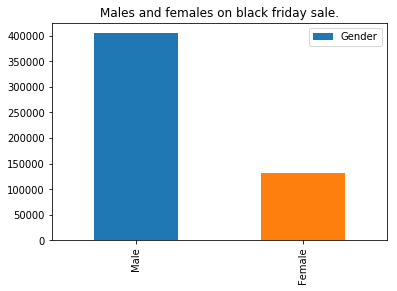

In [31]:
gender_count.plot(kind = 'bar', title="Males and females on black friday sale.", legend="True")

Surprisingly, Males tend to spend much during the black friday sale. Or, its also possible that the registered users are mostly males. 

**Let's say the supermarket decided to provide gift coupons to their top 5 customers of th black friday sale. Let's pick the top 5 users from the data, based on the amount of purchases they did.**

In [37]:
user_purchase = df.loc[:, ['User_ID','Purchase']].groupby('User_ID').sum()
user_purchase.sort_values('Purchase', ascending = False).head(5)

,Purchase
User_ID,
1004277,10536783
1001680,8699232
1002909,7577505
1001941,6817493
1000424,6573609


**Let's check the purchase pattern if we can draw any conclusions from it.**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


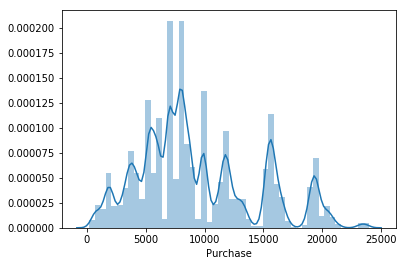

In [43]:
sns.distplot(df.loc[:,'Purchase'])

**Let's check how the stay in current city affects the purchase pattern.**

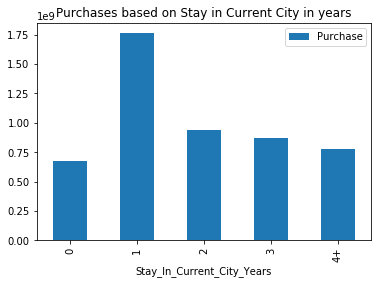

In [45]:
stay_purchase_df = df.loc[: , ['Stay_In_Current_City_Years','Purchase']]
stay_purchase_data = stay_purchase_df.groupby('Stay_In_Current_City_Years').sum()
stay_purchase_data.plot(kind = 'bar', title="Purchases based on Stay in Current City in years")

**Let's check out the top 5 popular products among the customers.**

In [47]:
df['Product_ID'].value_counts().head(5)

P00265242    1858
P00110742    1591
P00025442    1586
P00112142    1539
P00057642    1430
Name: Product_ID, dtype: int64

**Let's try to relate occupation with the purchases done.**

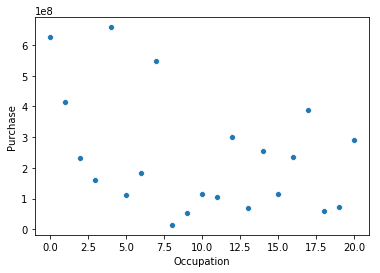

In [48]:
occupation_and_purchase = df.loc[:, ['Occupation','Purchase']]
oc = occupation_and_purchase.groupby('Occupation').sum()
sns.scatterplot(y = oc.Purchase, x = oc.index, data = oc)

**Purchases based on age group and gender.**

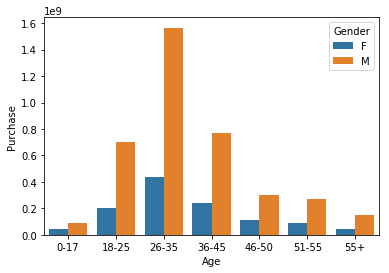

In [49]:
data=df.loc[:,['Age','Gender', 'Purchase']].groupby(['Age','Gender']).sum()
data.reset_index(drop=False, inplace = True)
sns.barplot(x= data['Age'], y=data['Purchase'], data = data , hue = data['Gender'])

# Conclusion
1. It's quite evident that Black Friday sale is more popular among males than the females.
2.  For age groups, there is a significant different between the purchases done by the person of age group 26-35 and rest other age groups.
3. For all the age groups, males have done more purchases than females.
4. Most people tends to spend between 5-10k during black friday.
5. People staying in city for 1 year have done more purchases than the others.